#### Business Report: Employee Retention Analysis for Salifort Motors

Executive Summary
Objective:
This analysis aims to predict employee attrition at Salifort Motors by using logistic regression, providing actionable insights on key factors influencing retention. The model enables the company to identify and address factors contributing to employee turnover thereby improving retention rates.

Key Findings:

Influential Features: Higher average monthly hours and the number of projects significantly increase the likelihood of attrition.

Retention Trends by Department: Certain departments have higher attrition rates, suggesting targeted departmental interventions may improve retention.

Satisfaction Impact: Employees with lower satisfaction are more likely to leave, reinforcing the importance of employee engagement.

Data Analysis Cleaning and Preprocessing

Categorical Variables: One-hot encoding was applied to categorical variables like department and salary to prepare the data for logistic regression.
Normalization: Continuous variables were scaled to improve model performance and interpretation of coefficients.
Model Selection and Metrics
Model Chosen:
A Logistic Regression model was selected for its interpretability and simplicity in handling binary classification tasks.

Model Performance
1. Evaluation Metrics

Accuracy: Measures the proportion of correct predictions out of total predictions, providing an overall performance score. Suppose the model achieves 82% accuracy, indicating it correctly classifies 82% of employees as likely to leave or stay.

Precision: Indicates the proportion of employees predicted to leave who actually left. A medium to high weighted precision (79%) means the model effectively identifies true attrition cases, reducing false positives.

Recall (Sensitivity): Reflects the model’s ability to identify employees who left, showing the proportion of actual attrition cases the model captures. If recall is 82%, the model is successful in identifying those likely to leave but the model results are weighted in favor of correctly predeicting those not likely to leave, helping to ensure at-risk employees are flagged.

F1 Score: Balances precision and recall, giving a single score that considers both metrics. This is valuable when we need a good balance, especially if the dataset has an uneven distribution of ‘leave’ and ‘stay’ cases as is the case.

Final test sample size used: 2792

                                 precision    recall  f1-score   support


      Predicted would not leave       0.86      0.93      0.90      2321


          Predicted would leave       0.44      0.26      0.33       471
    
                       accuracy                           0.82      2792
                      macro avg       0.65      0.60      0.61      2792
                   weighted avg       0.79      0.82      0.80      2792


2. Confusion Matrix Analysis The confusion matrix provides further insights:

True Positives (TP): Employees predicted to leave who did leave: 123

True Negatives (TN): Employees predicted to stay who did stay: 2172

False Positives (FP): Employees predicted to leave who actually stayed: 149

False Negatives (FN): Employees predicted to stay who actually left: 348

By minimizing FP and FN, we can increase precision and recall, respectively, optimizing the model for HR interventions.

Insights and Recommendations
Workload Management:
Employees with high project loads and long hours face higher attrition risk. Balancing workloads could enhance retention.

Satisfaction Programs:
Employee satisfaction strongly predicts retention, especially for at-risk departments. Programs to improve engagement, career growth, and work-life balance can mitigate turnover.

Department-Specific Interventions:
Departments with high attrition rates can benefit from tailored strategies, including flexible hours or incentive programs for R&D or Sales, where turnover may be higher.

Conclusion
The logistic regression model provides clear insights into factors contributing to employee attrition at Salifort Motors. By focusing on workload, satisfaction, and department-specific factors, the company can enhance retention, reduce turnover costs, and support a more engaged workforce. This analysis and model offer Salifort Motors a foundation for ongoing retention improvement efforts, positioning the company to address attrition proactively.

In [263]:
%pip install seaborn
%pip install seaborn 
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install xgboost
%pip install matplotlib

In [264]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [265]:
df = pd.read_csv("HR_capstone_dataset.csv")

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [267]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [268]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [269]:
# Rename columns as needed
df = df.rename (columns={'Work_accident': 'work_accident',
                         'average_montly_hours': 'average_monthly_hours',
                         'time_spend_company': 'tenure',
                          'Department': 'department'})



# Display all column names after the update
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [270]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [271]:
# Check for duplicates
df.duplicated().sum()

3008

In [272]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [273]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<function matplotlib.pyplot.show(close=None, block=None)>

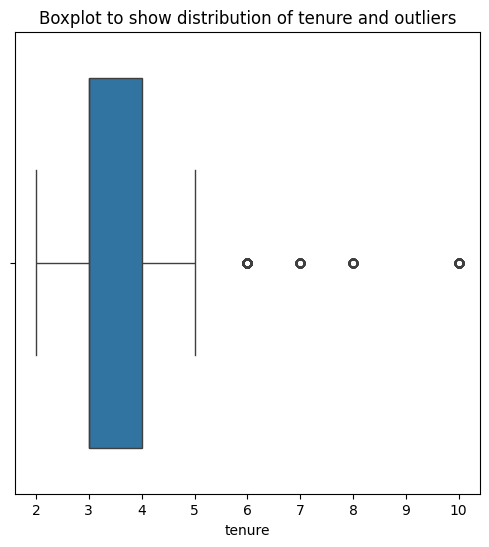

In [274]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to show distribution of tenure and outliers')
sns.boxplot(x=df1['tenure'])


plt.show

In [275]:
# Determine the number of rows containing outliers
percentile_25 = df1['tenure'].quantile(0.25)
percentile_75 = df1['tenure'].quantile(0.75)
iqr = percentile_75 - percentile_25

upper_limit = percentile_75 + 1.5 *iqr
lower_limit = percentile_25 -1.5 * iqr

print('Upper Limit: ', upper_limit)
print('Lower Limit: ', lower_limit)


outliers = df1[(df1['tenure'] < 1.5) | (df1['tenure']>5.5)]

outliers_old = df1[(df1['tenure'] > upper_limit)]

print(len(outliers))
print(len(outliers_old))

dfyl = df1.copy()
dfyl = dfyl[(dfyl['left'] == 1) & (dfyl['tenure'] <= 1.5)]
print('Number of employees who quit before 1.5 years of tenure: ', len(dfyl))
#dfol = dfol[(dfyl['left'] == 1) & (dfyl['tenure'] <= 1.5)]
print('Shortest tenure brfore an employee quit: ', df1['tenure'].min(), 'years')
print ('Average tenure: ',df1['tenure'].mean(), 'years', 'Median tenure: ', df1['tenure'].median(), 'years')
tenure_without_zeros = df1[df1['tenure'] > 0]
print('Corrected modal tenure:', tenure_without_zeros['tenure'].mode()[0], 'years')

Upper Limit:  5.5
Lower Limit:  1.5
824
824
Number of employees who quit before 1.5 years of tenure:  0
Shortest tenure brfore an employee quit:  2 years
Average tenure:  3.3648569760653824 years Median tenure:  3.0 years
Corrected modal tenure: 3 years


In [276]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts()

# Get percentages of people who left vs. stayed
df1['left'].value_counts(sum) *100


left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

<AxesSubplot:xlabel='average_monthly_hours', ylabel='promotion_last_5years'>

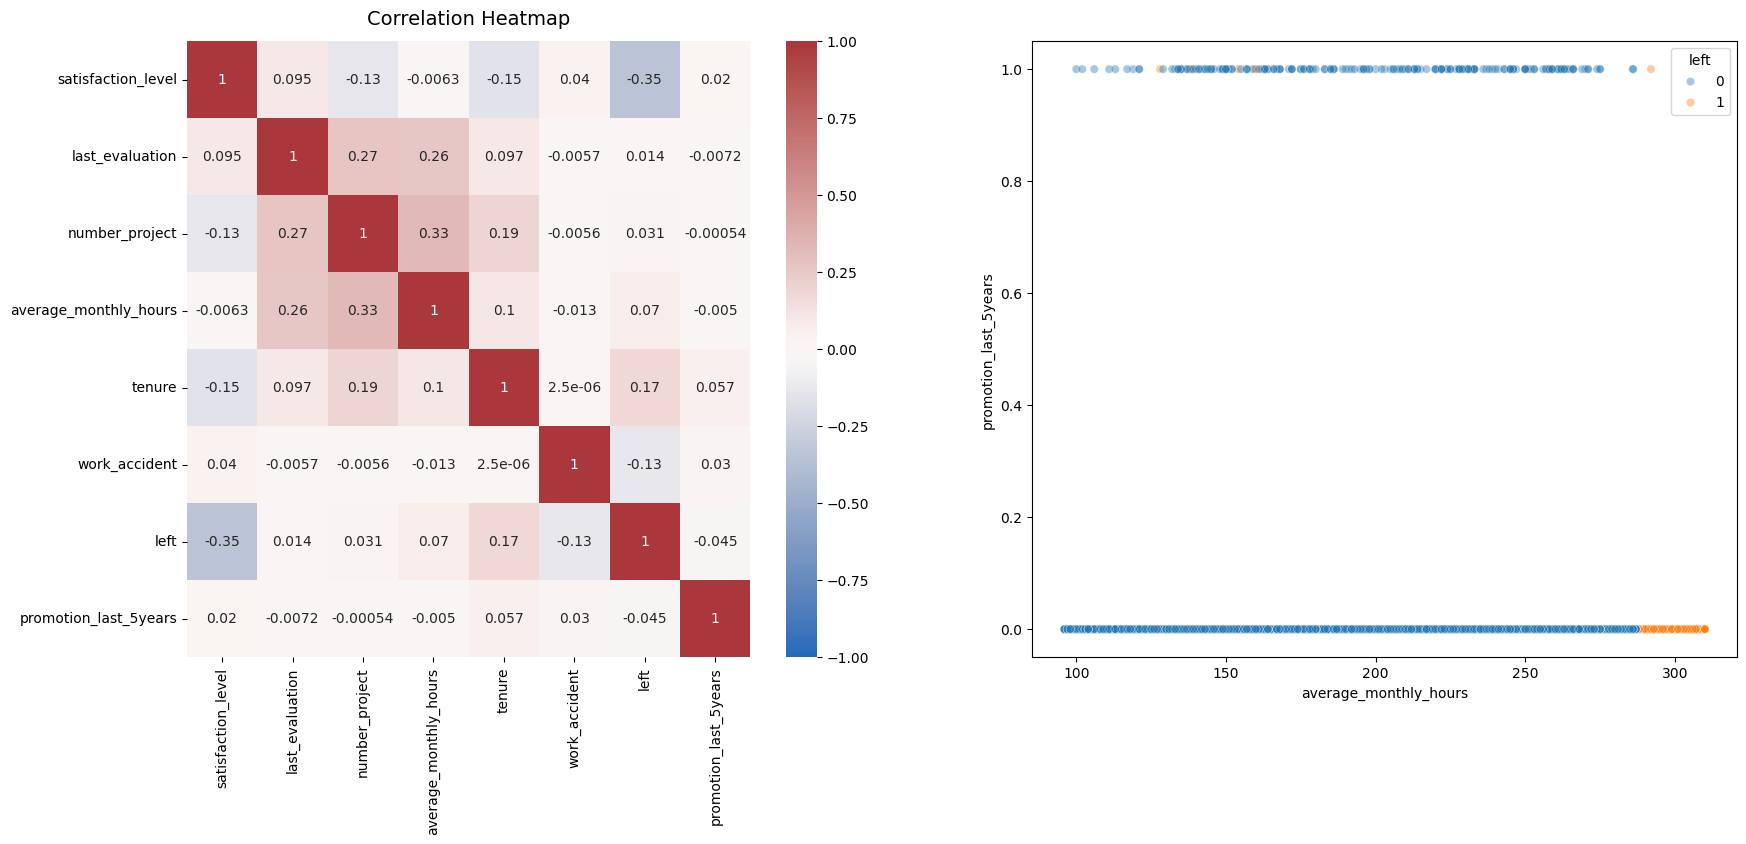

In [277]:

# Filter the DataFrame to include only numeric columns
df_numeric = df1.select_dtypes(include=[np.number])

# Now create the heatmap
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True), ax=ax[0])
ax[0].set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4, ax=ax[1])

#sns.scatterplot(data=df1, x='satisfaction_level', y='left', hue='left', alpha=0.4, ax=ax[1])

<AxesSubplot:xlabel='number_project', ylabel='Count'>

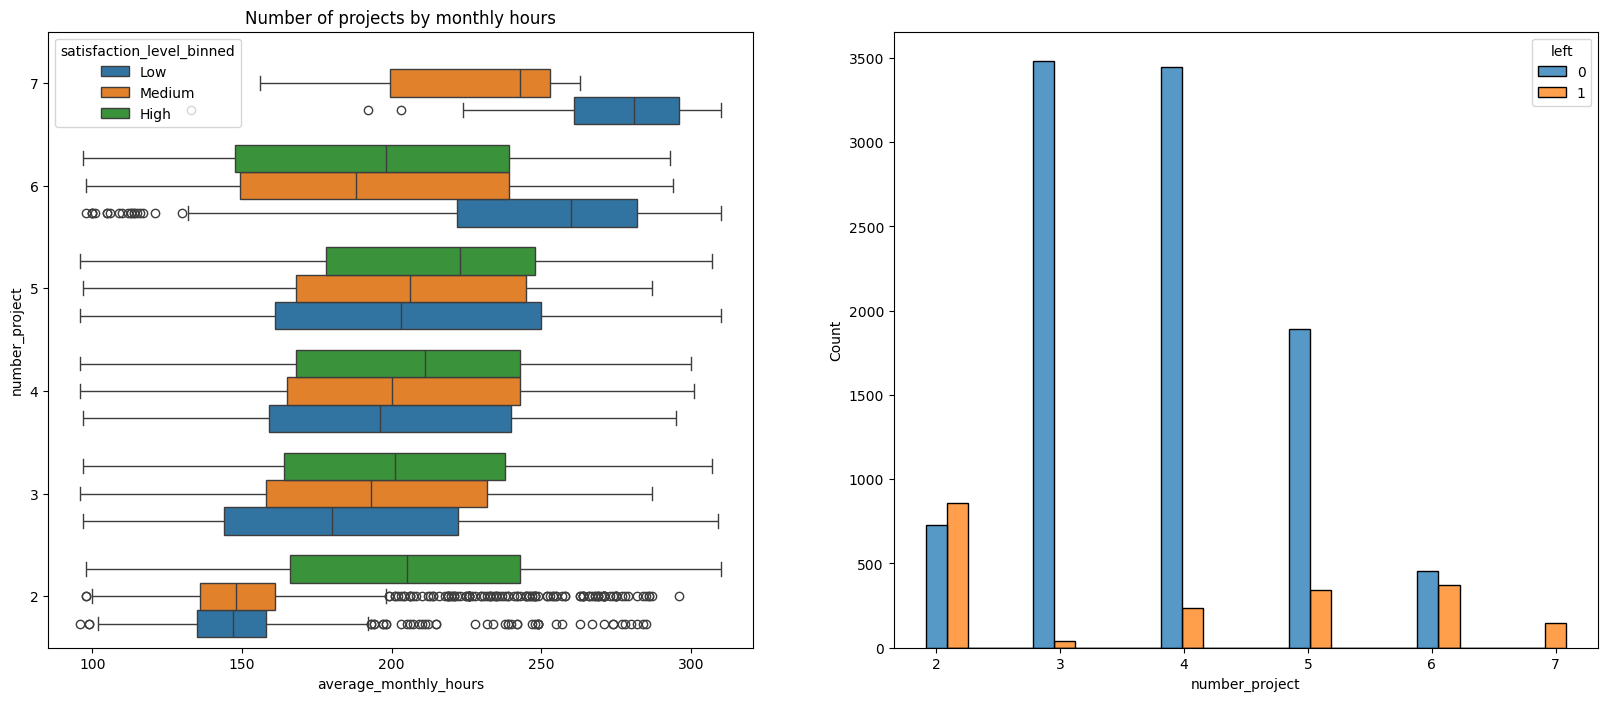

In [278]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(20,8))
# Bin satisfaction level if it's continuous
# If df1 is derived from another DataFrame, use .copy() to ensure it's independent
df2 = df1.copy()

# Now add the new column
df2['satisfaction_level_binned'] = pd.cut(df2['satisfaction_level'], bins=3, labels=['Low', 'Medium', 'High'])


sns.boxplot(data = df2, y = 'number_project', x = 'average_monthly_hours', orient="h", hue = 'satisfaction_level_binned', ax = ax[0])
ax[0].set_title('Number of projects by monthly hours')
ax[0].invert_yaxis()


tenure_stay = df2[df2['left'] == 1]['number_project']
tenure_leave = df2[df2['left'] == 0]['number_project']
sns.histplot(data = df2, x = 'number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])



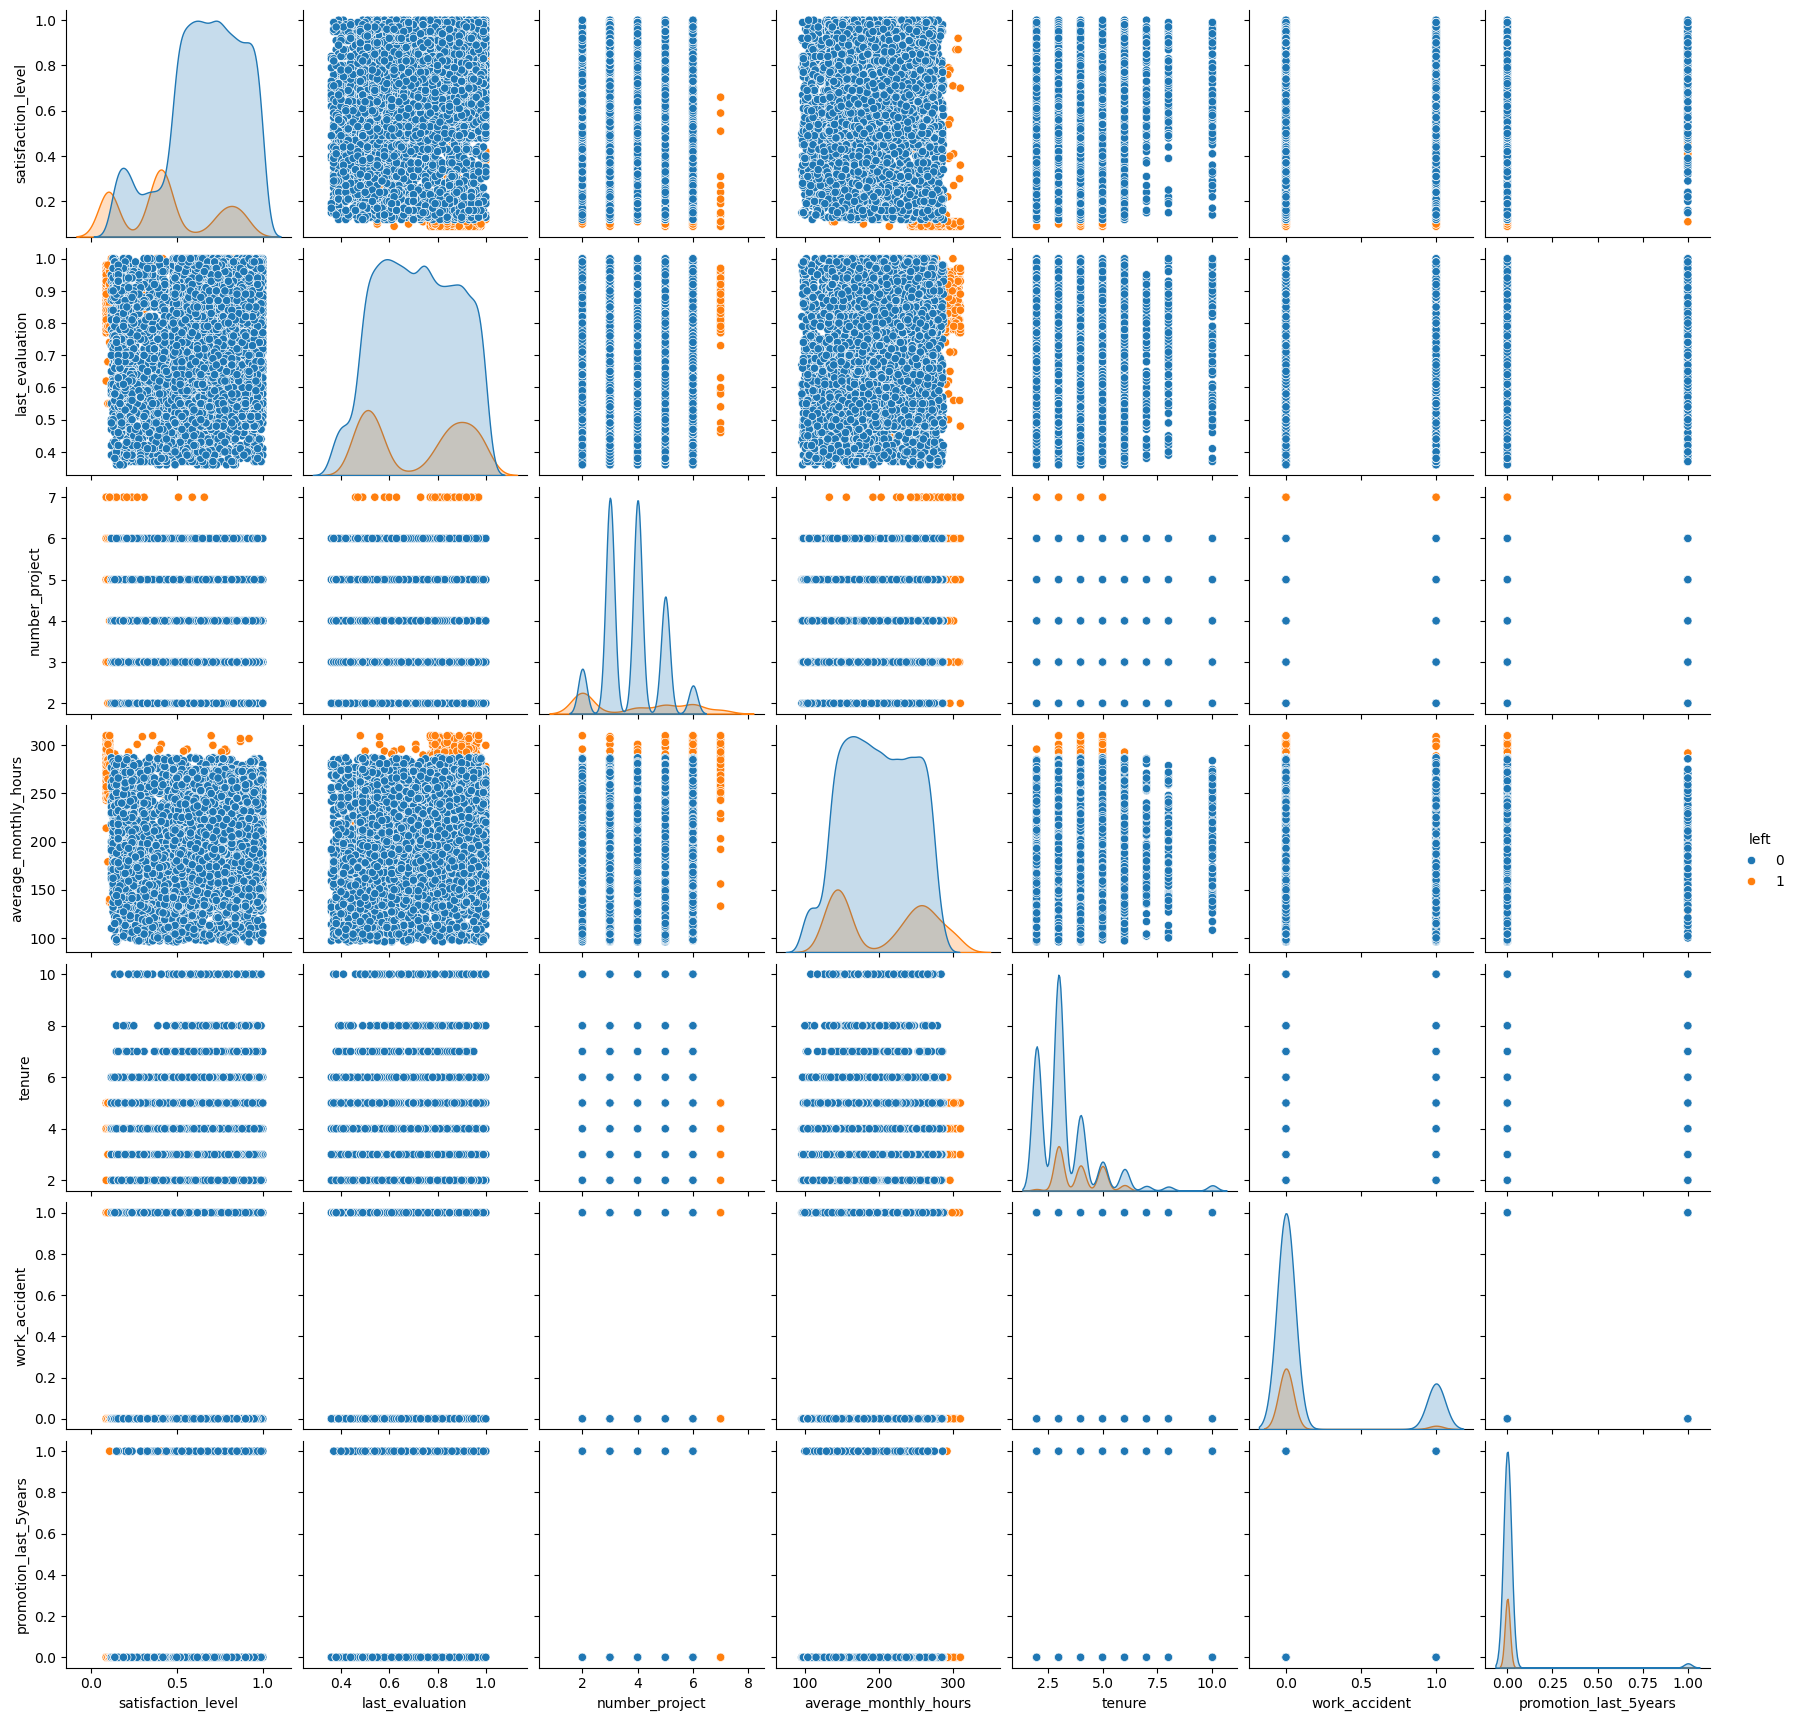

In [279]:
# Create a plot as needed
sns.pairplot(data=df1, hue = 'left')

<AxesSubplot:xlabel='tenure', ylabel='satisfaction_level'>

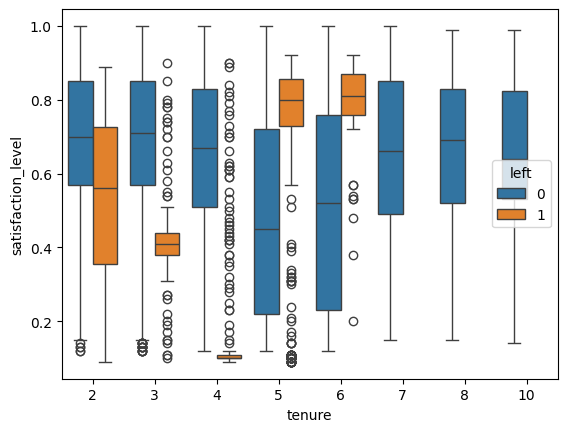

In [280]:
# Create a plot as needed
sns.boxplot(data = df1, x ='tenure', y = 'satisfaction_level', hue = 'left')


In [281]:
df1.groupby(['tenure'])['left'].agg("sum")

tenure
2      31
3     874
4     495
5     482
6     109
7       0
8       0
10      0
Name: left, dtype: int64

In [282]:
df1['tenure'].value_counts()

tenure
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

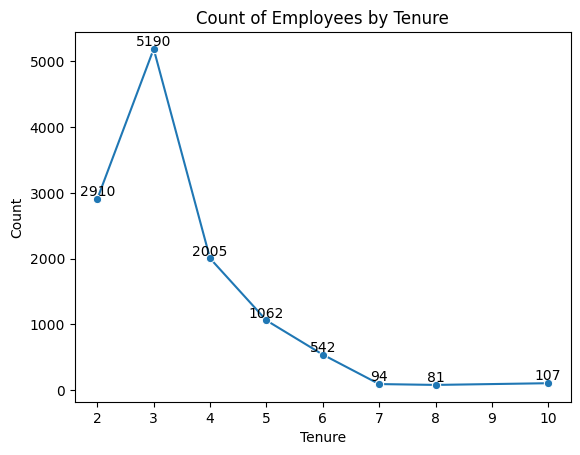

In [283]:
#sns.lineplot(data=df1, x = 'tenure')
tenure_counts = df1['tenure'].value_counts().sort_index()
tenure_counts_df = pd.DataFrame({'tenure': tenure_counts.index, 'count': tenure_counts.values})

# Plot the lineplot
sns.lineplot(data=tenure_counts_df, x='tenure', y='count', marker = 'o')
for x, y in zip(tenure_counts_df['tenure'], tenure_counts_df['count']):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Count of Employees by Tenure')
plt.show()

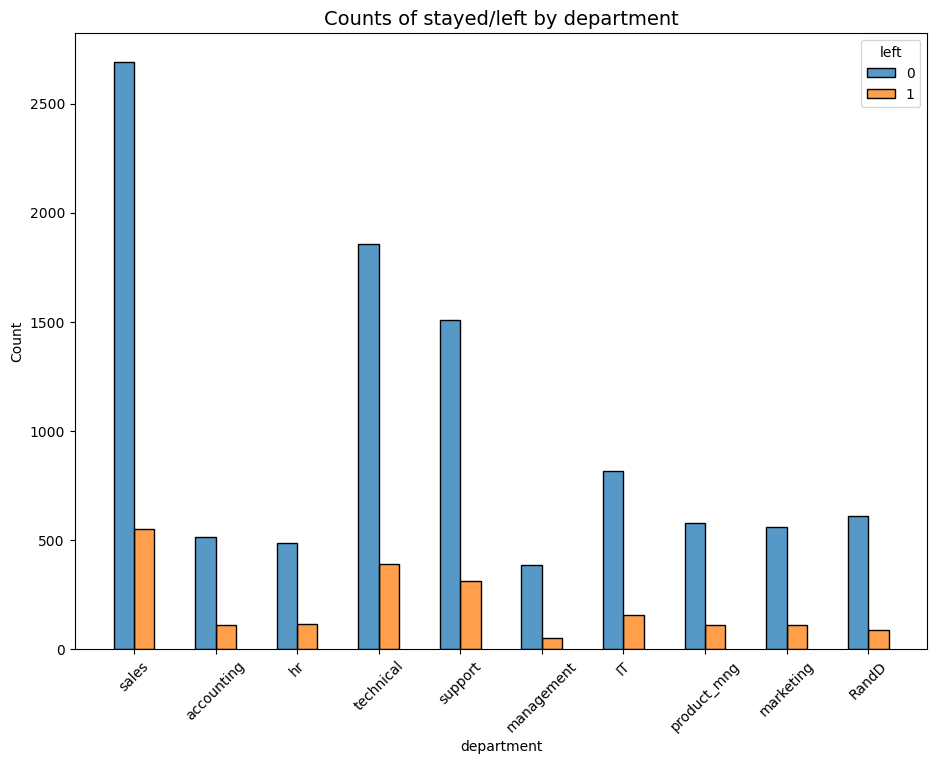

In [284]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


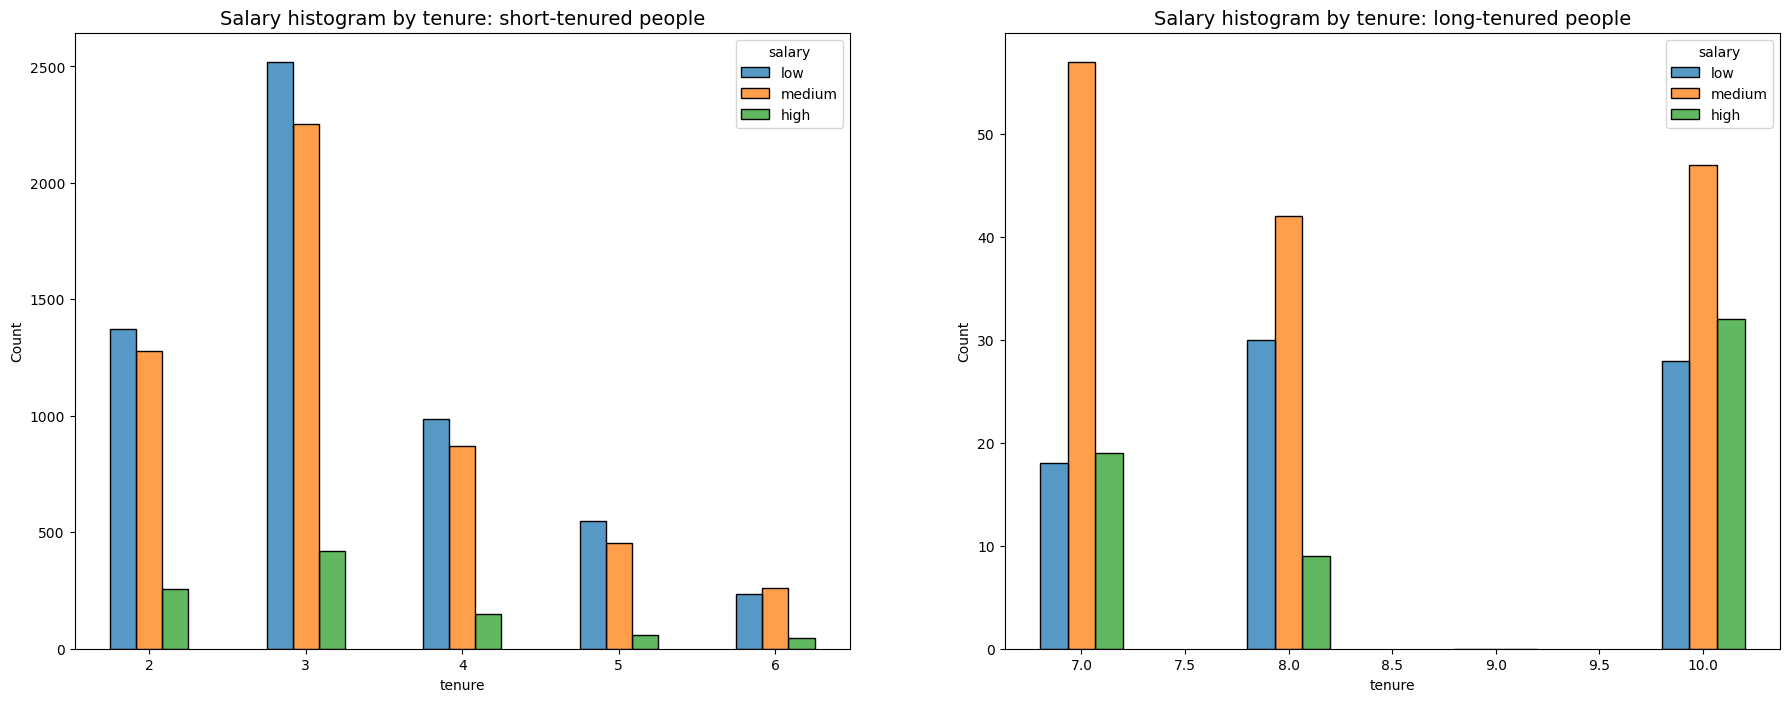

In [285]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

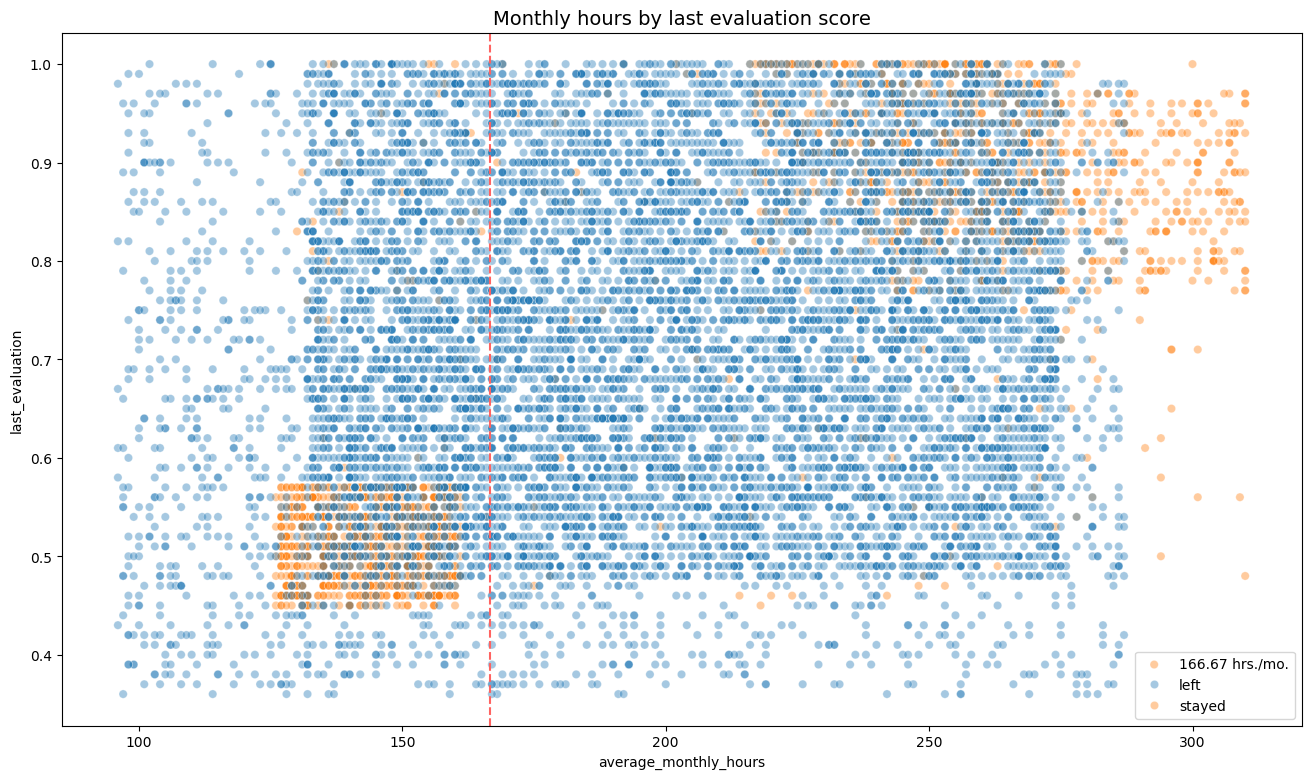

In [286]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

In [287]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
#df_enc['salary'] = (
 #   df_enc['salary'].astype('category')
#    .cat.set_categories(['low', 'medium', 'high'])
 #   .cat.codes
#)

# One hot encode departments 
#df_enc = pd.get_dummies(df_enc, drop_first=False

X_data_to_encode = df_enc[['salary','department']]
X_encoder = OneHotEncoder(drop='first', sparse_output = False)
X_data_encoded = X_encoder.fit_transform(X_data_to_encode)
df_enc1 = pd.DataFrame(data=X_data_encoded, columns = X_encoder.get_feature_names_out())

df_enc.drop(columns = ['salary','department'])

df_enc1 = pd.concat([df_enc.drop(columns = ['salary','department']).reset_index(drop = True), df_enc1], axis = 1)

# Display the new dataframe
df_enc1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


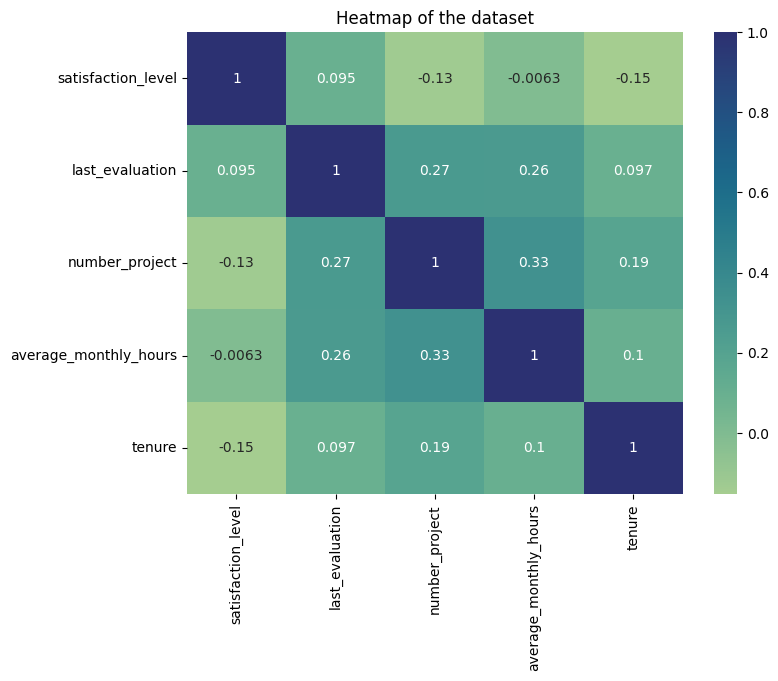

In [288]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

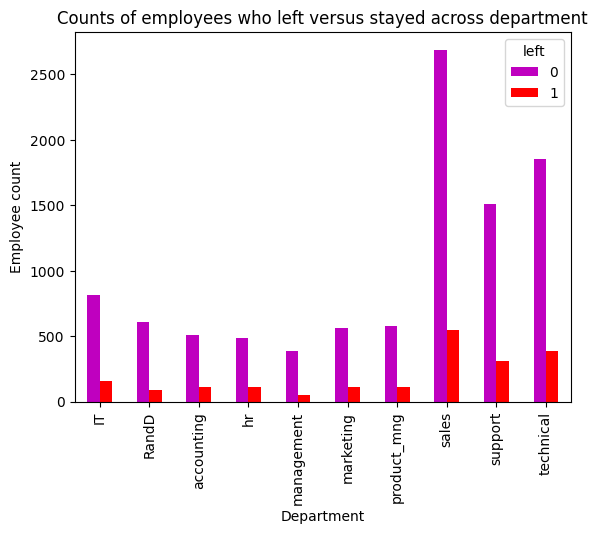

In [289]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [290]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc1[(df_enc1['tenure'] >= lower_limit) & (df_enc1['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.41,0.50,2,153,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [291]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [292]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.41,0.50,2,153,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [293]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [294]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [295]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

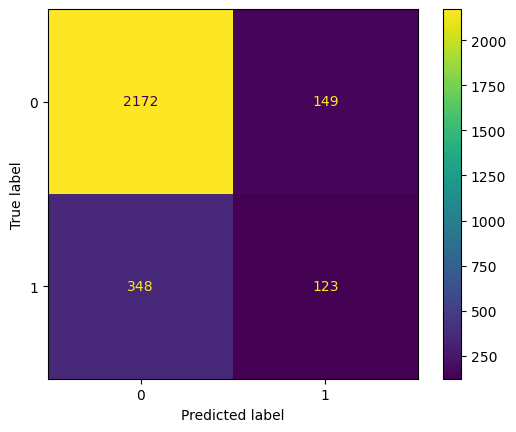

In [296]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [297]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [298]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.45      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792

